# Praktikum 2

Import von allen nötigen Bibliotheken:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.signal
from scipy.signal import find_peaks, filtfilt, find_peaks
from Lab2Functions import decg_peaks, d_ecg_peaks, Rwave_peaks

## Aufgabe 1
Siehe Laborbericht.

## Aufgabe 2
Siehe Laborbericht.

## Aufgabe 3
Plot der gefilterten Daten von jedem Teilnehmer beim Experiment in Ruhe:

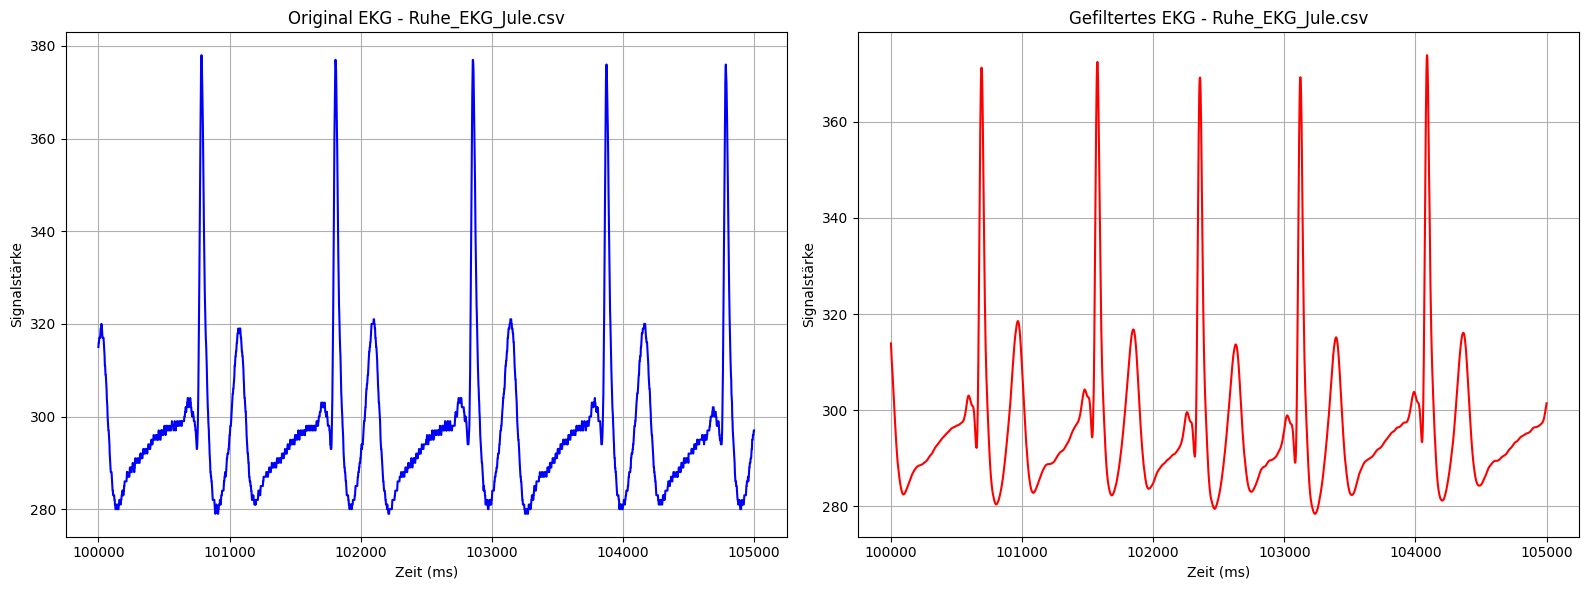

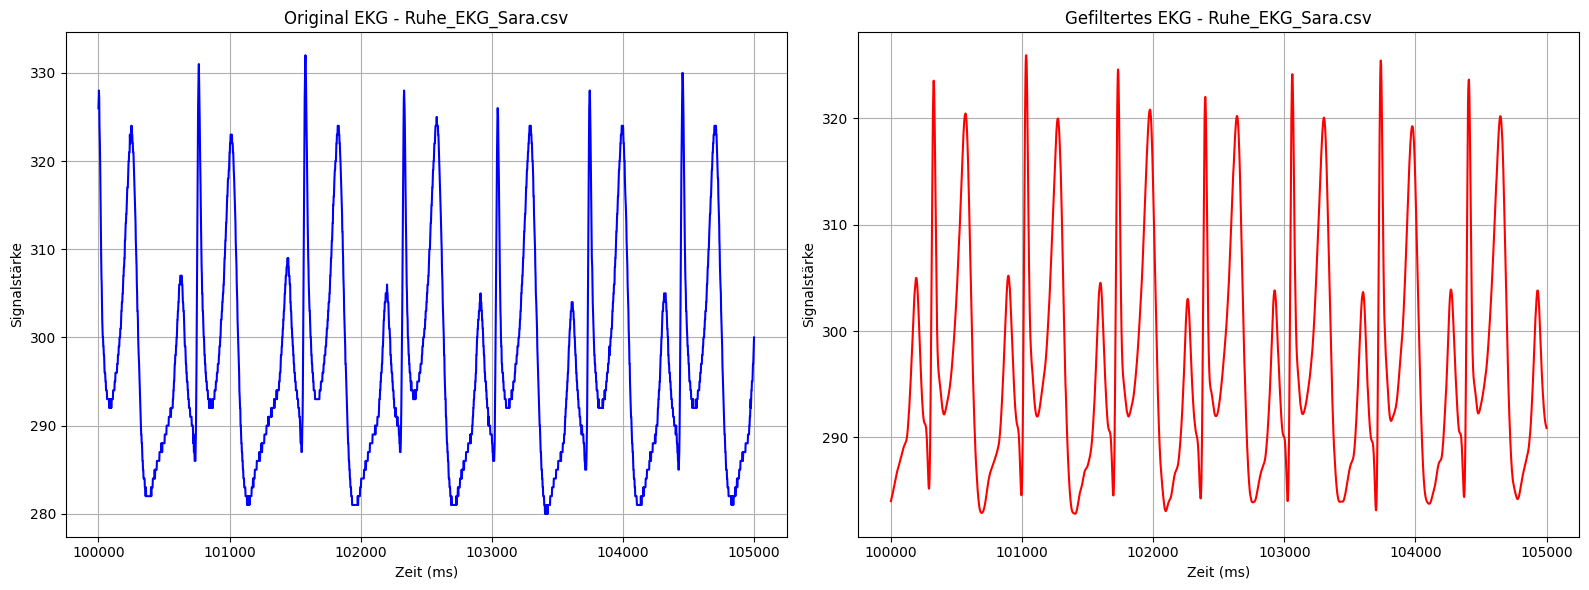

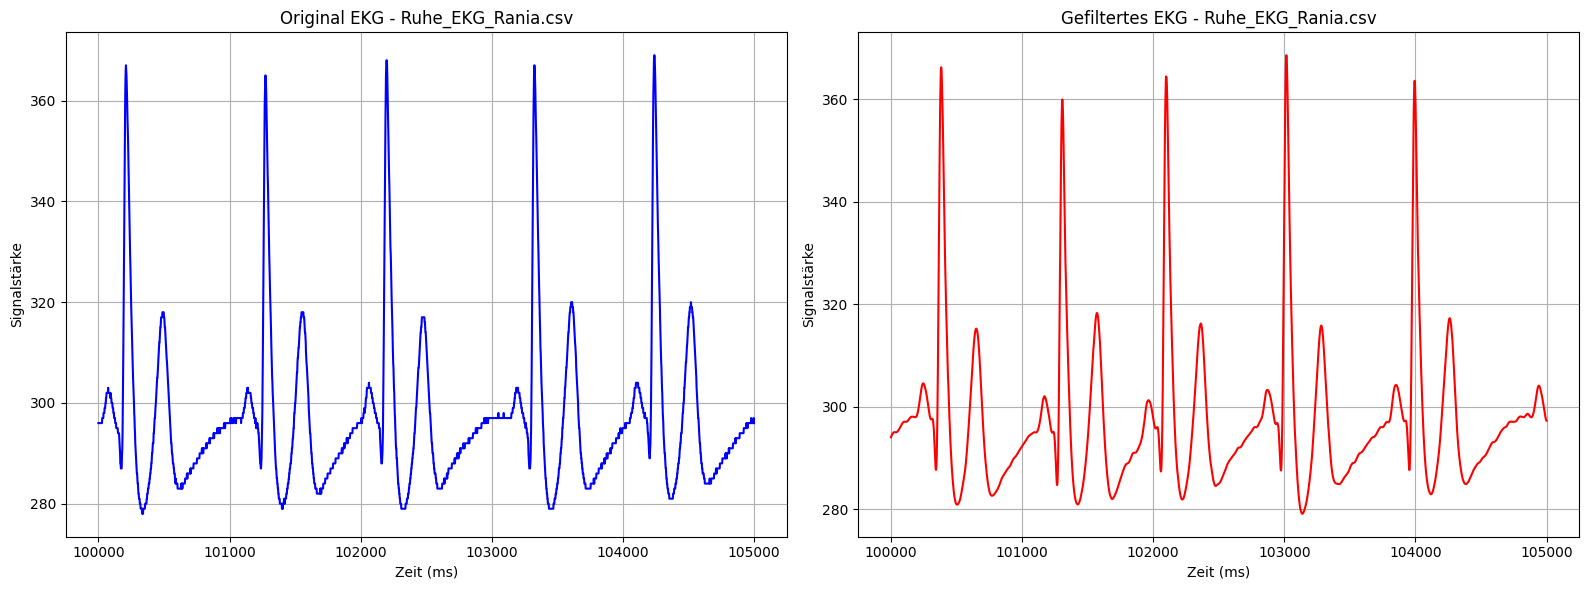

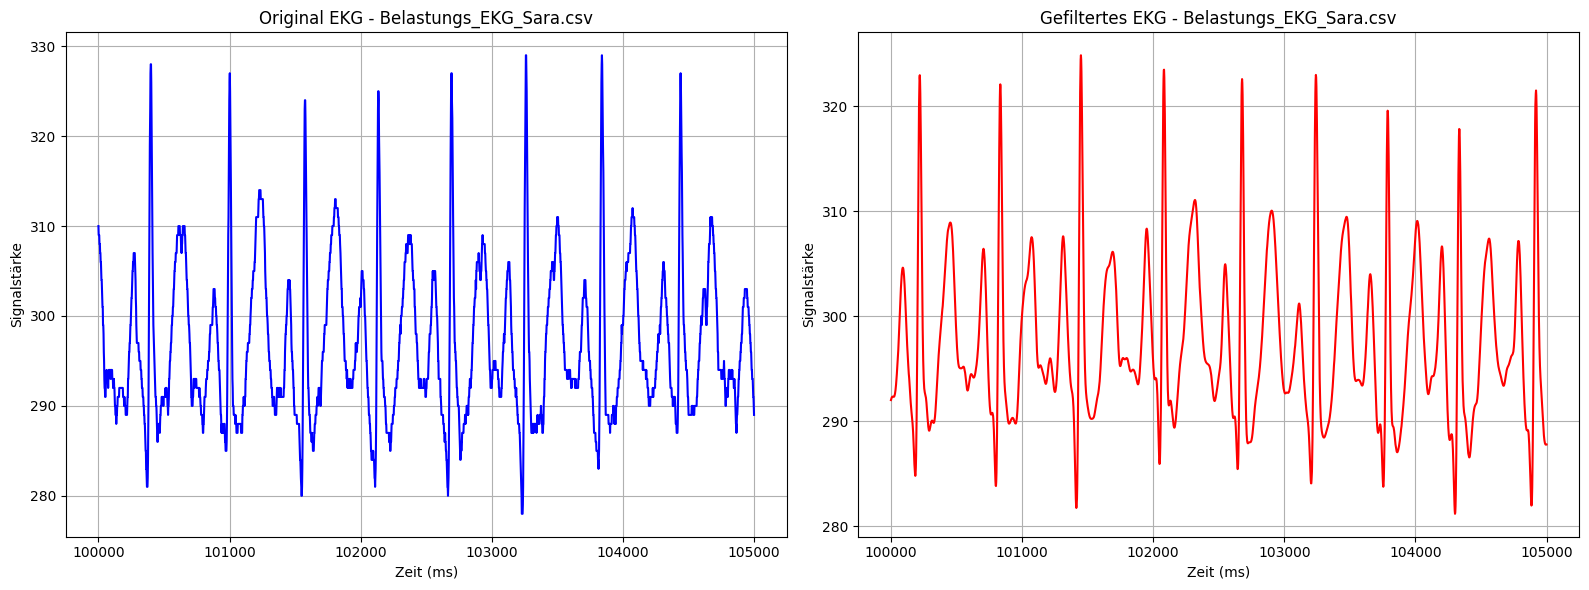

(array([100000., 100002., 100004., ..., 104996., 104998., 105000.]),
 array([292.01919605, 292.11044091, 292.19190058, ..., 287.77400832,
        287.77938858, 287.7883542 ]))

In [3]:
def plot_ekg(filename):
    # CSV-Datei einlesen; erste Spalte als 'Wert' und zweite Spalte als 'Zeit' benennen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Überprüfe auf Zeilen mit fehlenden oder falschen Werten
    df = df.dropna()  # Entferne Zeilen mit NaN-Werten
    df = df[df['Wert'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Wert' keine Zahl ist
    df = df[df['Zeit'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Zeit' keine Zahl ist
    
    # Extrahiere das EKG-Signal und die Zeit aus dem DataFrame
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Setze Filterparameter
    Wn = 0.1  # Normalisierte Cutoff-Frequenz
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)  # Butterworth-Filter erstellen
    
    # Filtere das EKG-Signal
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
        
    # Definiere die Start- und Endzeitpunkte für die Zeitspanne 
    start_time = 100000
    end_time = 105000
    
    # Filtere die Daten für die angegebene Zeitspanne
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    # Plotten der Original- und gefilterten EKG-Daten nebeneinander
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Originalsignal plotten (blau)
    axes[0].plot(mid_section['Zeit'], mid_section['Wert'], color='blue', linestyle='-')
    axes[0].set_title(f'Original EKG - {filename}')
    axes[0].set_xlabel('Zeit (ms)')
    axes[0].set_ylabel('Signalstärke')
    axes[0].grid(True)
    
    # Gefiltertes Signal plotten (rot)
    filtered_section = ecg_filtered[:len(mid_section)]
    axes[1].plot(mid_section['Zeit'], filtered_section, color='red', linestyle='-')
    axes[1].set_title(f'Gefiltertes EKG - {filename}')
    axes[1].set_xlabel('Zeit (ms)')
    axes[1].set_ylabel('Signalstärke')
    axes[1].grid(True)
    
    # Layout anpassen und anzeigen
    plt.tight_layout()
    plt.show()
    
    # Rückgabe der gefilterten Daten für die Wellenmarkierung
    return mid_section['Zeit'].values, filtered_section

# Aufruf der Funktion mit verschiedenen EKG-Daten
plot_ekg('Ruhe_EKG_Jule.csv')
plot_ekg('Ruhe_EKG_Sara.csv')
plot_ekg('Ruhe_EKG_Rania.csv')
plot_ekg('Belastungs_EKG_Sara.csv')

Plot mit Markierungen für P-Welle, QRS-Komplex und T-Welle eines Teilnehmers:

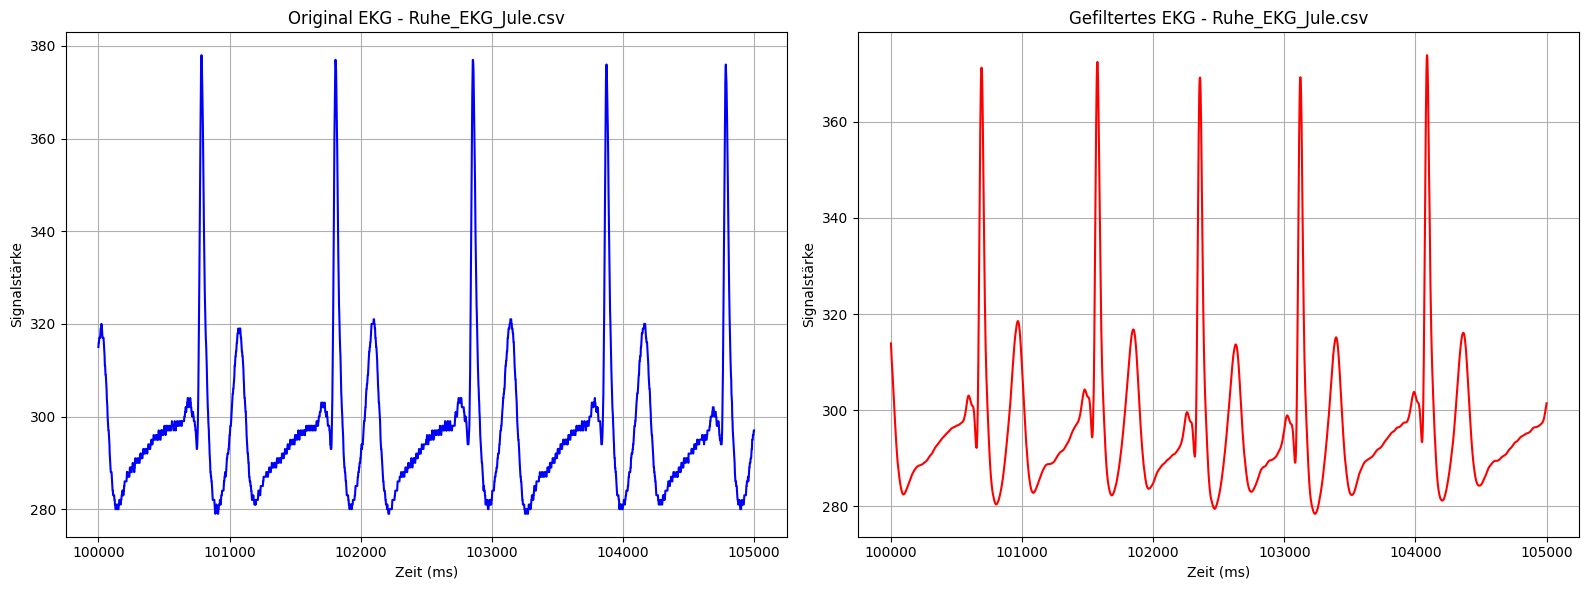

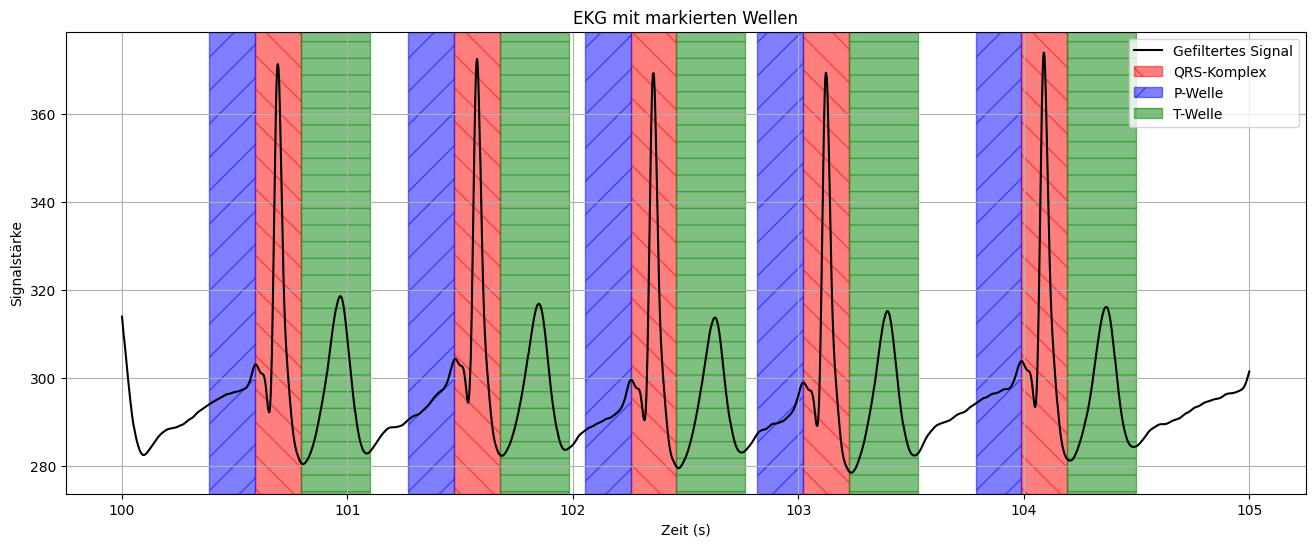

In [4]:
def mark_ekg_waves(time, signal):
    # Konvertiere Zeit in Sekunden
    time = time / 1000.0

    # QRS-Komplex detektieren
    peaks, _ = scipy.signal.find_peaks(
        signal,
        distance=200,  # Abstand zwischen Peaks (angepasst an typische EKG-Werte)
        height=np.mean(signal) + 0.5 * np.std(signal)  # Höhe basierend auf Mittelwert + 0.5 * Std
    )

    # Visualisieren
    plt.figure(figsize=(16, 6))
    plt.plot(time, signal, label='Gefiltertes Signal', color='black', linewidth=1.5)

    # Markiere P-Welle, QRS-Komplex und T-Welle
    for peak in peaks:
        qrs_start = max(0, peak - 50)  # QRS-Komplex beginnt typischerweise 50 ms vor dem Peak
        qrs_end = min(len(signal), peak + 50)  # QRS-Komplex endet 50 ms nach dem Peak

        p_wave_start = max(0, peak - 150)  # P-Welle liegt typischerweise 150 ms vor dem Peak
        p_wave_end = qrs_start

        t_wave_start = qrs_end
        t_wave_end = min(len(signal), peak + 200)  # T-Welle liegt typischerweise 200 ms nach dem Peak

        # Markiere QRS-Komplex (unterschiedliche Grautöne)
        plt.axvspan(time[qrs_start], time[qrs_end], color='red', alpha=0.5, hatch='\\', label='QRS-Komplex' if peak == peaks[0] else "")

        # Markiere P-Welle (unterschiedliche Grautöne)
        plt.axvspan(time[p_wave_start], time[p_wave_end], color='blue', alpha=0.5, hatch='/', label='P-Welle' if peak == peaks[0] else "")

        # Markiere T-Welle (unterschiedliche Grautöne)
        plt.axvspan(time[t_wave_start], time[t_wave_end], color='green', alpha=0.5, hatch='-', label='T-Welle' if peak == peaks[0] else "")

    # Beschriftungen (in Sekunden)
    plt.xlabel('Zeit (s)')
    plt.ylabel('Signalstärke')
    plt.title('EKG mit markierten Wellen')
    plt.legend()
    plt.grid(True)
    plt.show()

time, signal = plot_ekg('Ruhe_EKG_Jule.csv')
mark_ekg_waves(time, signal)

Beschreibung: Siehe Laborbericht

## Aufgabe 4
Siehe Laborbericht.

## Aufgabe 5
Plot von einem Teilnehmer mit markierten R-Zacken:

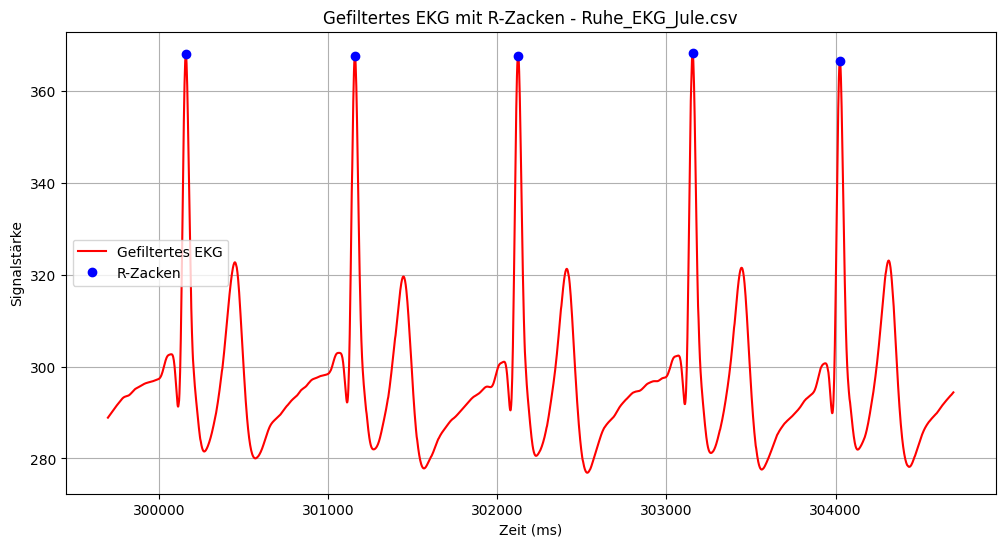

In [5]:
# Funktion zur Darstellung des EKG-Signals mit markierten R-Zacken
def plot_ekg_with_peaks(Ruhe_EKG_Jule):
    # CSV-Datei einlesen
    df = pd.read_csv(Ruhe_EKG_Jule, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()

    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Butterworth-Filter anwenden
    Wn = 0.075  # Normalisierte Cutoff-Frequenz --> Frequnez von 1 auf 0.075 geändert
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Zeitraum für die mittleren 5 Sekunden
    start_time = time[0] + (time[-1] - time[0]) / 2 - 2500
    end_time = start_time + 5000
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    if len(mid_section) == 0:
        print(f"Keine Daten im angegebenen Zeitraum für {Ruhe_EKG_Jule}.")
        return
    
    # Gefiltertes Signal für den Zeitraum
    filtered_section = ecg_filtered[(time >= start_time) & (time <= end_time)]
    section_time = time[(time >= start_time) & (time <= end_time)]

    # Find Peaks Funktion zur Markierung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(filtered_section, height=0.5, distance=150)

    # Plotten der gefilterten EKG-Daten mit markierten R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(section_time, filtered_section, color='red', label='Gefiltertes EKG')
    plt.plot(section_time[peaks], filtered_section[peaks], 'bo', label='R-Zacken')
    plt.title(f'Gefiltertes EKG mit R-Zacken - {Ruhe_EKG_Jule}')
    plt.xlabel('Zeit (ms)')
    plt.ylabel('Signalstärke')
    plt.legend()
    plt.grid(True)
    plt.show()

# Funktion aufrufen für die Daten von Jule
plot_ekg_with_peaks('Ruhe_EKG_Jule.csv')

## Aufgabe 6
Tabelle mit mittlerer Herzfrequenz und Herzfrequenzvariabilität der drei Teilnehemer: 


Daten für Jule...


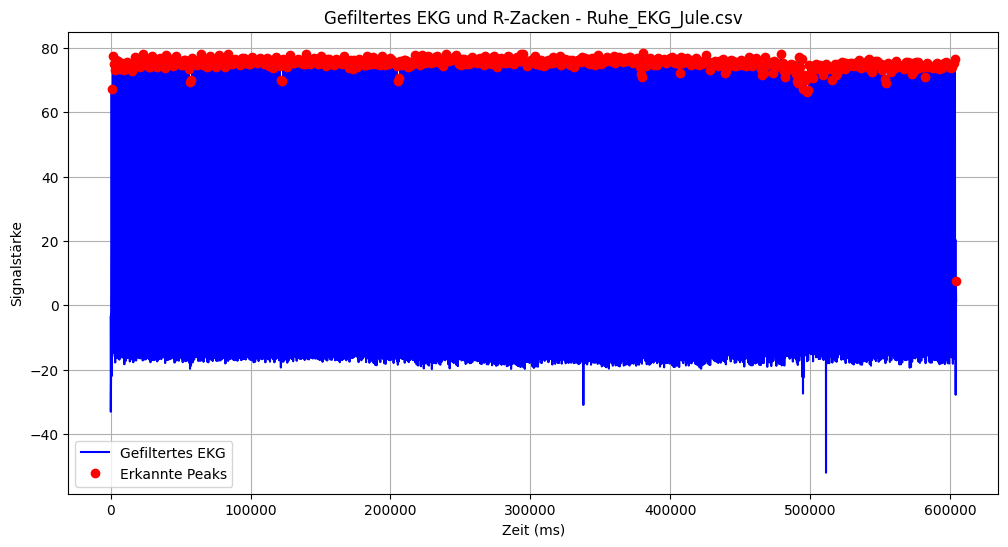


Daten für Rania...


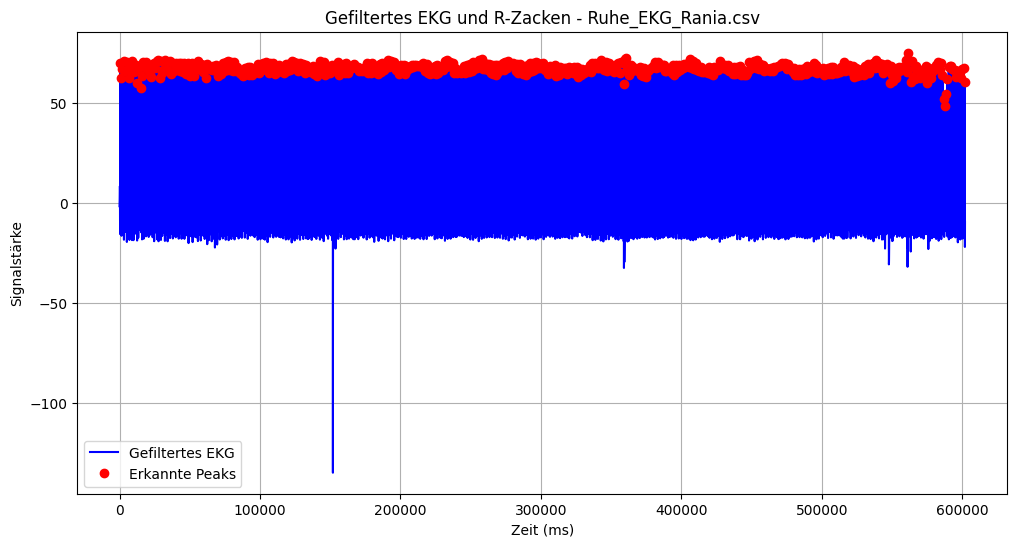


Daten für Sara...


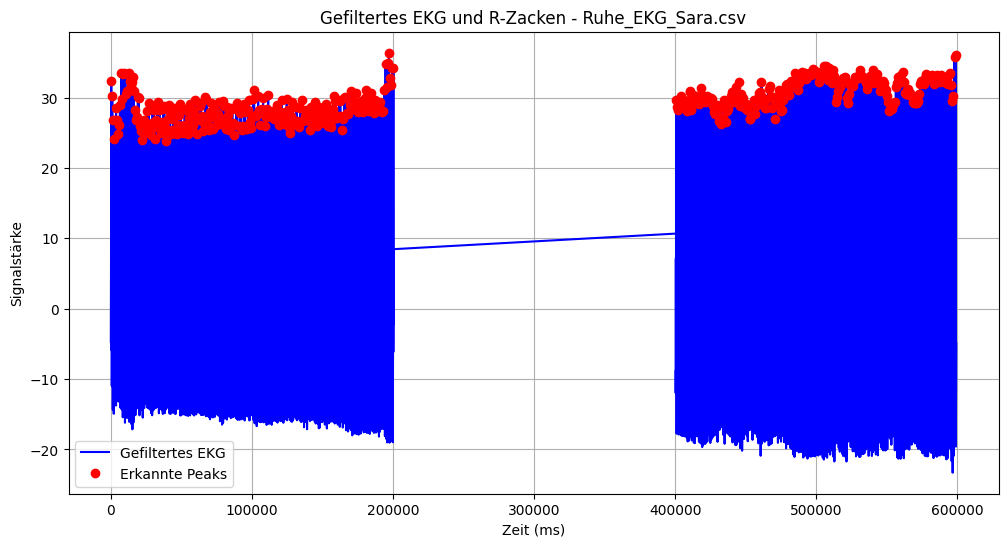


Ergebnisse:
    Name  Avg Heart Rate (BPM)     HRV (ms)
0   Jule             63.725084    89.673241
1  Rania             63.055603   115.869545
2   Sara             52.231362  9191.174196

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 52.23 BPM und eine HRV von 9191.17 ms.


In [6]:
def calculate_hr_and_hrv_with_visualization(filename):
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Plot des Signals und der erkannten Peaks
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG und R-Zacken - {filename}")
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Daten für jeden Teilnehmer berechnen und visualisieren
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    print(f"\nDaten für {name}...")
    avg_hr, hrv = calculate_hr_and_hrv_with_visualization(file)
    results.append({"Name": name, "Avg Heart Rate (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle drucken
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Avg Heart Rate (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")

Achtung!!!
Die Ergebnisse von Sara stimmen so nicht, desswegen müssen die im Folgenden noch mal überarbeitet werden:

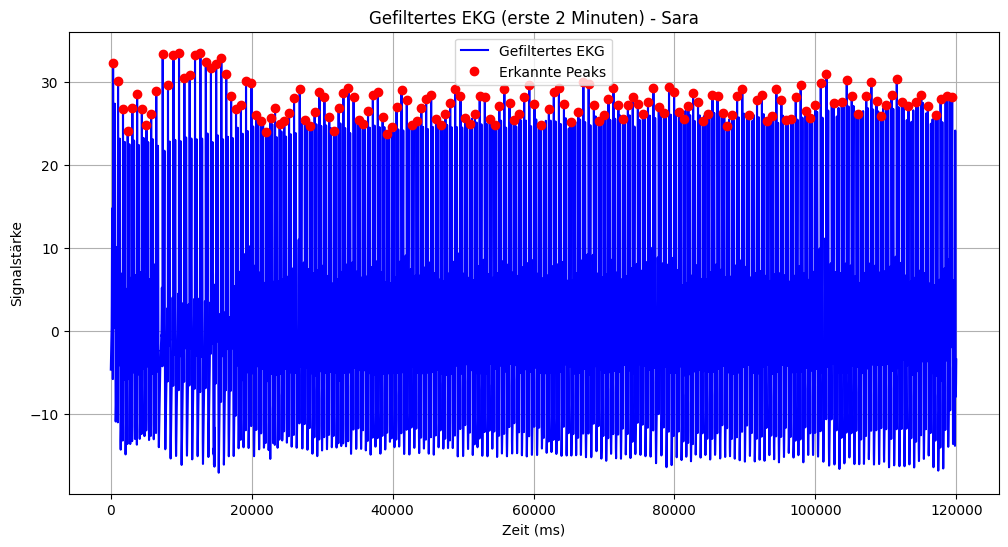

Mittlere Herzfrequenz (BPM): 81.62
Herzfrequenzvariabilität (HRV, ms): 104.16


In [7]:
# code für Heart Rate Variability (HRV) Analyse für Ruhe-EKG-Daten von Sara 
def calculate_hr_and_hrv_for_sara(filename, duration=120000):
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Beschränke auf die ersten 2 Minuten der Messung
    df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Plot des gefilterten Signals mit R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG (erste 2 Minuten) - Sara")
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return avg_heart_rate, hrv

# Berechnung und Plot für Sara
sara_file = "Ruhe_EKG_Sara.csv"  # Pfad zur Datei
sara_avg_hr, sara_hrv = calculate_hr_and_hrv_for_sara(sara_file)

# Ergebnisse ausgeben
print(f"Mittlere Herzfrequenz (BPM): {sara_avg_hr:.2f}")
print(f"Herzfrequenzvariabilität (HRV, ms): {sara_hrv:.2f}")

Neuer Vergleich der Daten:

In [8]:
def calculate_hr_and_hrv(filename, duration=None):
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Beschränke auf die angegebene Zeitdauer
    if duration is not None:
        df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Berechnungen für alle drei Teilnehmer
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    avg_hr, hrv = calculate_hr_and_hrv(file, duration=120000 if name == "Sara" else None)
    results.append({"Name": name, "Mittlere Herzfrequenz (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle anzeigen
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse ausgeben
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Mittlere Herzfrequenz (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")


Ergebnisse:
    Name  Mittlere Herzfrequenz (BPM)    HRV (ms)
0   Jule                    63.725084   89.673241
1  Rania                    63.055603  115.869545
2   Sara                    81.619629  104.156778

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 81.62 BPM und eine HRV von 104.16 ms.


Zusammenfassung: Siehe Laborbericht

## Aufgabe 7.a
Code um Einheiten rauszulöschen und Kommas durch Punkte zu ersetzten:

In [9]:
# Laden der CSV-Datei
df = pd.read_csv('HeartRateData.csv')

# Überprüfen der Struktur der Daten (ersten paar Zeilen des DataFrames)
print(df.head())

# Bereinigen der Spalten, indem die Einheiten entfernt werden und das Komma durch einen Punkt ersetzt wird
df['mittlere Herzfrequenz'] = df['mittlere Herzfrequenz'].str.replace(' bpm', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Herzfrequenzvariabilität'] = df['Herzfrequenzvariabilität'].str.replace(' ms', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Überprüfen, ob die Bereinigung erfolgreich war
print(df.head())

# Speichern der bereinigten Datei in einer neuen CSV-Datei
df.to_csv('HeartRateData_cleaned.csv', index=False)

              Name (Gruppe) mittlere Herzfrequenz Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)             66,02 bpm                55,15 ms    
1       Lenard Zaschke (F2)             69,35 bpm                 62,16 ms   
2          Svenja Taft (F2)             74,61 bpm                 41,43 ms   
3  Tobias Wannenmacher (C2)             74.88 bpm                 64.41 ms   
4      Kathrin Gutmann (F1)             62.61 bpm                123.59 ms   

  Geschlecht (m/w)  
0                w  
1                m  
2                w  
3                m  
4                w  
              Name (Gruppe)  mittlere Herzfrequenz  Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)                  66.02                     55.15   
1       Lenard Zaschke (F2)                  69.35                     62.16   
2          Svenja Taft (F2)                  74.61                     41.43   
3  Tobias Wannenmacher (C2)                  74.88                     64.41   
4    

Code für die Histogramme:

              Name (Gruppe)  mittlere Herzfrequenz  Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)                  66.02                     55.15   
1       Lenard Zaschke (F2)                  69.35                     62.16   
2          Svenja Taft (F2)                  74.61                     41.43   
3  Tobias Wannenmacher (C2)                  74.88                     64.41   
4      Kathrin Gutmann (F1)                  62.61                    123.59   

  Geschlecht (m/w)  
0                w  
1                m  
2                w  
3                m  
4                w  


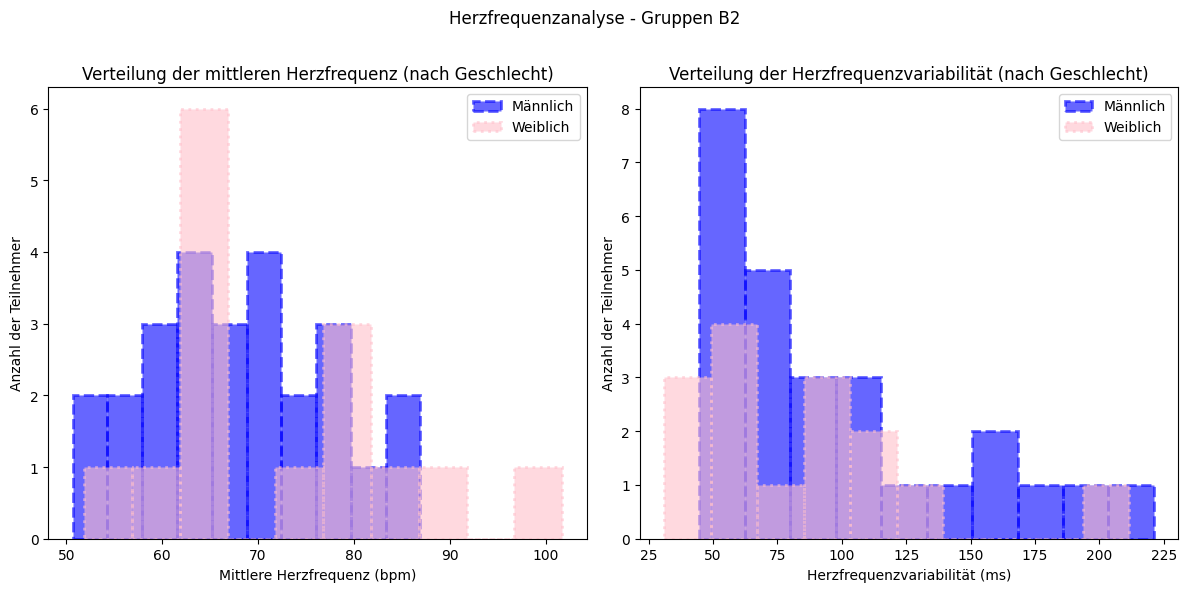

In [10]:
# Laden der CSV-Datei
df = pd.read_csv('HeartRateData_cleaned.csv')

# Überprüfen der Struktur der Daten (die Spalten und die ersten paar Zeilen)
print(df.head())

# Erstellen von zwei Histogrammen, eines für die mittlere Herzfrequenz und eines für die Variabilität
plt.figure(figsize=(12, 6))

# Histogramm für die mittlere Herzfrequenz
plt.subplot(1, 2, 1)
df_male = df[df['Geschlecht (m/w)'] == 'm']
df_female = df[df['Geschlecht (m/w)'] == 'w']

plt.hist(df_male['mittlere Herzfrequenz'], bins=10, alpha=0.6, color='blue', edgecolor='blue', linestyle='--', linewidth=2, label='Männlich')
plt.hist(df_female['mittlere Herzfrequenz'], bins=10, alpha=0.6, color='pink',edgecolor='pink', linestyle=':', linewidth=2, label='Weiblich')
plt.title('Verteilung der mittleren Herzfrequenz (nach Geschlecht)')
plt.xlabel('Mittlere Herzfrequenz (bpm)')
plt.ylabel('Anzahl der Teilnehmer')
plt.legend()

# Histogramm für die Herzfrequenzvariabilität
plt.subplot(1, 2, 2)
plt.hist(df_male['Herzfrequenzvariabilität'], bins=10, alpha=0.6, color='blue', edgecolor='blue', linestyle='--', linewidth=2, label='Männlich')
plt.hist(df_female['Herzfrequenzvariabilität'], bins=10, alpha=0.6, color='pink', edgecolor='pink', linestyle=':', linewidth=2, label='Weiblich')
plt.title('Verteilung der Herzfrequenzvariabilität (nach Geschlecht)')
plt.xlabel('Herzfrequenzvariabilität (ms)')
plt.ylabel('Anzahl der Teilnehmer')
plt.legend()

# Hinzufügen des Gruppennamen zur Beschriftung
plt.suptitle('Herzfrequenzanalyse - Gruppen B2')

# Anzeigen des Plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Platz für den Titel
plt.show()

Vergleich zwischen den Geschlechtern: Siehe Laborbericht

## Aufgabe 7.b
Plot für den Vergleich der persönlichen Daten in Bezug auf die Gesamtverteilung der Klasse:

Vergleich der mittlere Herzfrequenz mit der Klasse:
- Durchschnitt der Klasse: 69.46
- Standardabweichung der Klasse: 11.25
- Jule: 63.73 (unter dem Klassendurchschnitt)
- Rania: 63.06 (unter dem Klassendurchschnitt)
- Sara: 81.62 (über dem Klassendurchschnitt)


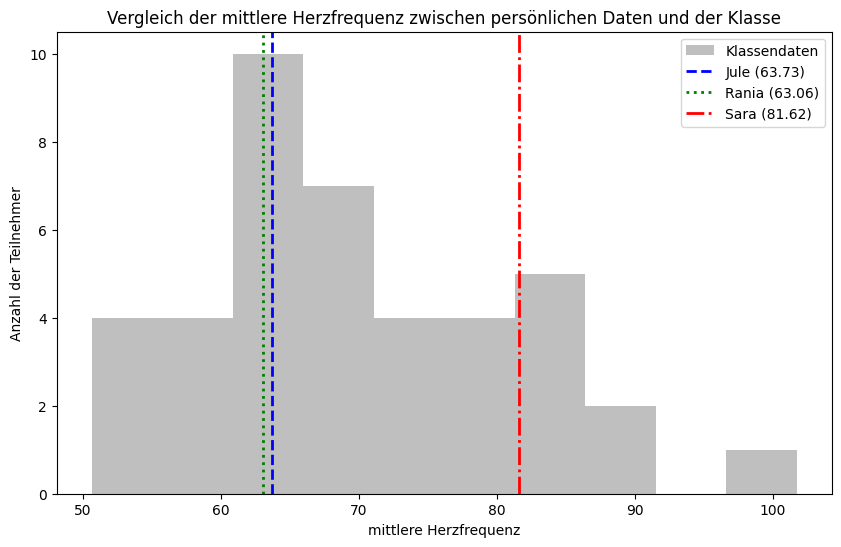

Vergleich der Herzfrequenzvariabilität mit der Klasse:
- Durchschnitt der Klasse: 90.54
- Standardabweichung der Klasse: 47.60
- Jule: 89.67 (unter dem Klassendurchschnitt)
- Rania: 115.87 (über dem Klassendurchschnitt)
- Sara: 104.16 (über dem Klassendurchschnitt)


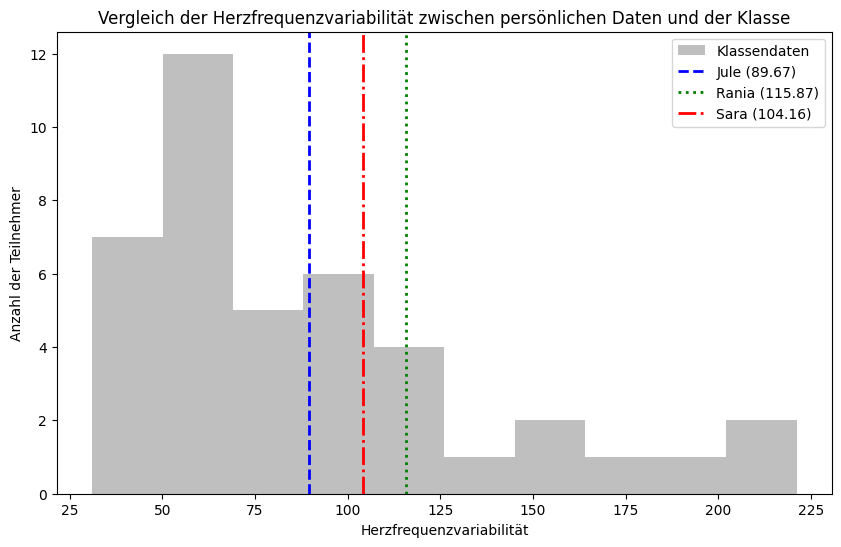

In [11]:
# unsere Ergebnisse
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    avg_hr, hrv = calculate_hr_and_hrv(file, duration=120000 if name == "Sara" else None)
    results.append({"Name": name, "mittlere Herzfrequenz": avg_hr, "Herzfrequenzvariabilität": hrv})

# Ergebnisse in ein DataFrame umwandeln
personal_results_df = pd.DataFrame(results)

# Einlesen der Klassendaten
class_data = pd.read_csv("HeartRateData_cleaned.csv")

# Berechnung der Durchschnittswerte der Klasse
class_avg_heart_rate = class_data['mittlere Herzfrequenz'].mean()
class_avg_hrv = class_data['Herzfrequenzvariabilität'].mean()

# Berechnung der Standardabweichung der Klasse
class_std_heart_rate = class_data['mittlere Herzfrequenz'].std()
class_std_hrv = class_data['Herzfrequenzvariabilität'].std()

# Vergleich der persönlichen Daten mit den Klassendurchschnittswerten
def compare_with_class(personal_data_df, class_avg, class_std, parameter_name):
    print(f"Vergleich der {parameter_name} mit der Klasse:")
    print(f"- Durchschnitt der Klasse: {class_avg:.2f}")
    print(f"- Standardabweichung der Klasse: {class_std:.2f}")
    
    # Durchlaufe alle Teilnehmer und vergleiche ihre Werte
    for index, row in personal_data_df.iterrows():
        personal_value = row[parameter_name]
        print(f"- {row['Name']}: {personal_value:.2f} ({'über' if personal_value > class_avg else 'unter'} dem Klassendurchschnitt)")

# Plotten der Ergebnisse als Histogramme
def plot_comparison(personal_data_df, class_data, parameter_name):
    plt.figure(figsize=(10, 6))
    
    # Histogramm: Klassendaten
    plt.hist(class_data[parameter_name], bins=10, alpha=0.5, label='Klassendaten', color='gray')
    
    # Persönliche Werte: Vertikale Linien
    line_styles = {'Jule': '--', 'Rania': ':', 'Sara': '-.'} 
    colors = {'Jule': 'blue', 'Rania': 'green', 'Sara': 'red'}
    for index, row in personal_data_df.iterrows():
        personal_value = row[parameter_name]
        plt.axvline(
            personal_value, 
            color=colors[row['Name']], 
            linestyle=line_styles[row['Name']], 
            linewidth=2, 
            label=f"{row['Name']} ({personal_value:.2f})"
        )
    
    # Beschriftungen und Titel
    plt.xlabel(parameter_name)
    plt.ylabel("Anzahl der Teilnehmer")
    plt.title(f"Vergleich der {parameter_name} zwischen persönlichen Daten und der Klasse")
    
    # Legende: Doppelte Einträge entfernen
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

# Vergleich der mittleren Herzfrequenz
compare_with_class(personal_results_df, class_avg_heart_rate, class_std_heart_rate, "mittlere Herzfrequenz")
plot_comparison(personal_results_df, class_data, "mittlere Herzfrequenz")

# Vergleich der Herzfrequenzvariabilität
compare_with_class(personal_results_df, class_avg_hrv, class_std_hrv, "Herzfrequenzvariabilität")
plot_comparison(personal_results_df, class_data, "Herzfrequenzvariabilität")

Interpretation: Siehe Laborbericht

## Aufgabe 7.c
Siehe Laborbericht.

## Aufgabe 8
Plot der gefilterten Herzfrequenz vom Experiment in Bewegung:

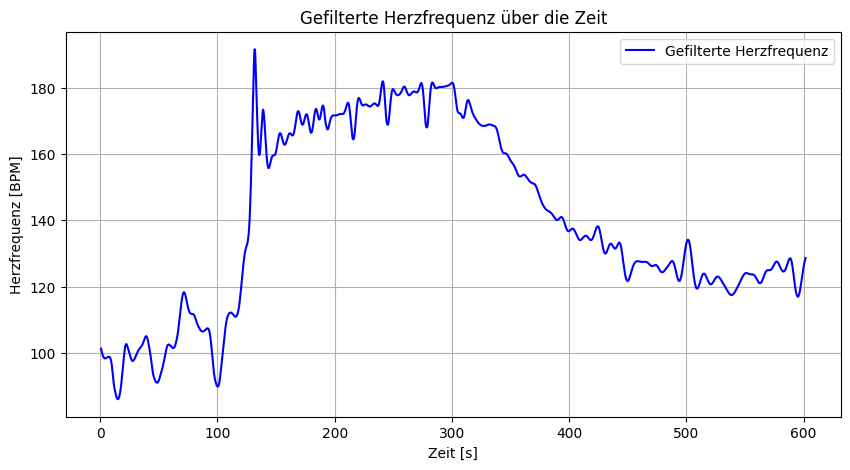

In [12]:
# EKG-Daten einlesen und filtern
def process_ecg_data(filename, fs, lowcut, highcut, order=4):
    
    # Laden der EKG-Daten aus der angegebenen Datei
    data = pd.read_csv(filename, delimiter=';', header=None)
    data.columns = ['signal', 'zeit']

    # Konvertieren der Spalten in numerische Werte und Entfernen ungültiger Einträge
    data = data.apply(pd.to_numeric, errors='coerce')
    data.dropna(inplace=True)

    # Extrahieren der Signal- und Zeitspalten, Konvertierung der Zeit von Millisekunden in Sekunden
    ecg_signal = data['signal'].values
    time = data['zeit'].values / 1000

    # Anwenden eines Tiefpassfilters, um hochfrequentes Rauschen zu entfernen
    wn = 50 / (0.5 * fs)  # Normierung der Grenzfrequenz
    b, a = scipy.signal.butter(order, wn, 'low', analog=False)
    ecg_lowpass = scipy.signal.filtfilt(b, a, ecg_signal)

    # Anwenden eines Bandpassfilters, um den gewünschten Frequenzbereich zu isolieren
    ecg_filtered = bandpass_filter(ecg_lowpass, fs, lowcut, highcut, order)

    return time, ecg_signal, ecg_filtered 

# Funktion zum Anwenden eines Bandpassfilters
def bandpass_filter(data, fs, lowcut, highcut, order=4):
    # Definition der normierten Grenzfrequenzen
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Entwurf und Anwendung des Filters
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, data)

# Berechnung der Peaks und plot der Herzfrequenz
filename = 'belastung_Anna.csv'  
fs = 1000  # Abtastfrequenz (in Hz)
lowcut = 0.5  # Untere Grenzfrequenz für den Bandpassfilter
highcut = 50  # Obere Grenzfrequenz für den Bandpassfilter

# Verarbeitung der EKG-Daten
time, ecg_signal, ecg_filtered = process_ecg_data(filename, fs, lowcut, highcut)

# Ableitung des EKG-Signals berechnen und Peaks finden
d_ecg, peaks_d_ecg = decg_peaks(ecg_filtered, time)

# R-Zacken (R-Wellen) identifizieren
Rwave_peaks_d_ecg = d_ecg_peaks(d_ecg, peaks_d_ecg, time, heightper=0.6, distanceper=0.5)
Rwave_t = Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time)

# RR-Intervalle und Herzfrequenz (in BPM) berechnen
rr_intervals = np.diff(Rwave_t)
heartrate = 60 / rr_intervals  # Umrechnung der RR-Intervalle in Herzfrequenz (BPM)

# Glätten der Herzfrequenz
wn = 0.1  # Normierte Grenzfrequenz für den Filter
b2, a2 = scipy.signal.butter(4, wn, btype='low')  # Tiefpassfilter (Butterworth)
heartrate_filtered = scipy.signal.filtfilt(b2, a2, heartrate)  # Filter anwenden

# Zeitachse für die Herzfrequenz basierend auf den RR-Intervallen berechnen
hr_time = (Rwave_t[:-1] + Rwave_t[1:]) / 2  # Mittelpunkte der RR-Intervalle

# Herzfrequenz über die Zeit plotten
plt.figure(figsize=(10, 5))
plt.plot(hr_time, heartrate_filtered, color='b', label='Gefilterte Herzfrequenz')
plt.xlabel('Zeit [s]')  # Beschriftung der x-Achse
plt.ylabel('Herzfrequenz [BPM]')  # Beschriftung der y-Achse
plt.title('Gefilterte Herzfrequenz über die Zeit')  # Titel des Plots
plt.grid(True)  # Gitterlinien für bessere Lesbarkeit
plt.legend()  # Legende anzeigen
plt.show()  # Plot anzeigen

## Aufgabe 9.a
Plot der gefilterten Herzfrequenz beim Start der Belastung:

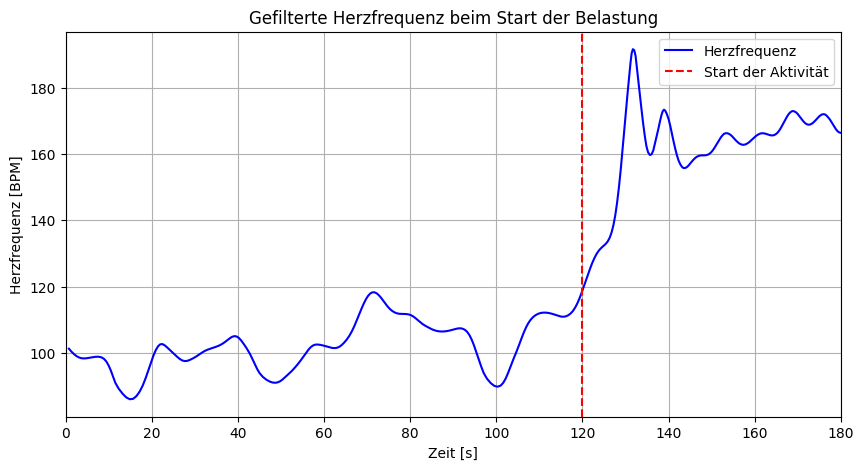

In [13]:
# Herzfrequenz filtern und nur die ersten drei Minuten auswählen
mask_3min = hr_time <= 180  # Maske für die ersten 3 Minuten (Zeit ≤ 180 Sekunden)
hr_time_3min = hr_time[mask_3min]
heartrate_filtered_3min = heartrate_filtered[mask_3min]

plt.figure(figsize=(10, 5))

plt.plot(hr_time_3min, heartrate_filtered_3min, color='b', label='Herzfrequenz')

# Hinzufügen einer senkrechten Linie bei 120 Sekunden (2 Minuten)
plt.axvline(x=120, color='r', linestyle='--', label='Start der Aktivität')

# Beschriftung der Achsen und Titel
plt.xlabel('Zeit [s]')
plt.ylabel('Herzfrequenz [BPM]')
plt.xlim(0, 180) 
plt.title('Gefilterte Herzfrequenz beim Start der Belastung')
plt.grid(True)
plt.legend()  # Legende anzeigen
plt.show()  # Plot anzeigen

## Aufgabe 9.b
Siehe Laborbericht.

## Aufgabe 9.c
Siehe Laborbericht.

## Aufgabe 10.a
Plot der gefilterten Herzfrequenz beim Ende der Belastung:

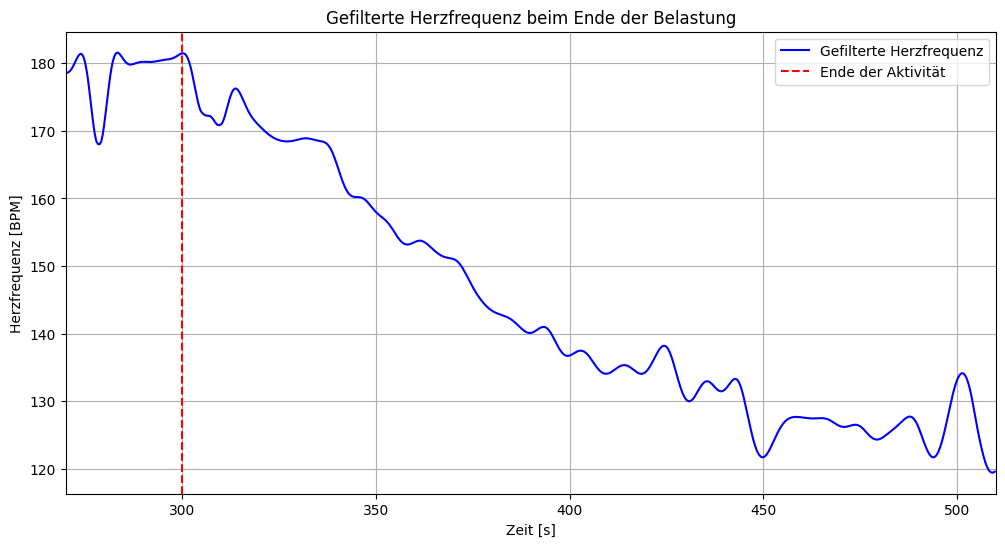

In [14]:
# Berechnung der Peaks und plot der Herzfrequenz
filename = 'belastung_Anna.csv'  
fs = 1000  # Abtastfrequenz (in Hz)
lowcut = 0.5  # Untere Grenzfrequenz für den Bandpassfilter
highcut = 50  # Obere Grenzfrequenz für den Bandpassfilter

# Verarbeitung der EKG-Daten
time, ecg_signal, ecg_filtered = process_ecg_data(filename, fs, lowcut, highcut)

# Ableitung des EKG-Signals berechnen und Peaks finden
d_ecg, peaks_d_ecg = decg_peaks(ecg_filtered, time)

# R-Zacken (R-Wellen) identifizieren
Rwave_peaks_d_ecg = d_ecg_peaks(d_ecg, peaks_d_ecg, time, heightper=0.6, distanceper=0.5)
Rwave_t = Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time)

# RR-Intervalle und Herzfrequenz (in BPM) berechnen
rr_intervals = np.diff(Rwave_t)
heartrate = 60 / rr_intervals  # Umrechnung der RR-Intervalle in Herzfrequenz (BPM)

# Glätten der Herzfrequenz
wn = 0.1  # Normierte Grenzfrequenz für den Filter
b2, a2 = scipy.signal.butter(4, wn, btype='low')  # Tiefpassfilter (Butterworth)
heartrate_filtered = scipy.signal.filtfilt(b2, a2, heartrate)  # Filter anwenden

# Zeitachse für die Herzfrequenz basierend auf den RR-Intervallen berechnen
hr_time = (Rwave_t[:-1] + Rwave_t[1:]) / 2  # Mittelpunkte der RR-Intervalle

# Berechnung des Zeitbereichs für die Herzfrequenz von Minute 4 bis Minute 8
start_time = 4.5 * 60  # Startzeitpunkt (4 Minuten in Sekunden)
end_time = 8.5 * 60  # Endzeitpunkt (8 Minuten in Sekunden)

# Auswahl der relevanten Daten im Zeitintervall
time_mask = (hr_time >= start_time) & (hr_time <= end_time)
hr_time_segment = hr_time[time_mask]
heartrate_segment = heartrate_filtered[time_mask]

# Plot der gefilterten Herzfrequenz für den Zeitbereich
plt.figure(figsize=(12, 6))
plt.plot(hr_time_segment, heartrate_segment, color='b', label='Gefilterte Herzfrequenz')
plt.axvline(x=5 * 60, color='r', linestyle='--', label='Ende der Aktivität')  # Markierung bei Minute 5
plt.xlabel('Zeit [s]')
plt.ylabel('Herzfrequenz [BPM]')
plt.xlim(270,510)
plt.title('Gefilterte Herzfrequenz beim Ende der Belastung')
plt.grid(True)
plt.legend()
plt.show()

## Aufgabe 10.b
Siehe Laborbericht.

## Aufgabe 10.c
Siehe Laborbericht.

## Aufgabe 11
Siehe Laborbericht.

## Aufgabe 12
Plot und Berechnung des metabolischen Energieverbrauchs:

Ruheherzfrequenz (resting_hr): 103.01 BPM
Maximale Herzfrequenz (max_hr): 191.57 BPM
Kumulativer Energieverbrauch pro Minute:
Nach Minute 1: 7.62 kcal
Nach Minute 2: 16.76 kcal
Nach Minute 3: 36.70 kcal
Nach Minute 4: 58.99 kcal
Nach Minute 5: 82.88 kcal
Nach Minute 6: 103.99 kcal
Nach Minute 7: 119.60 kcal
Nach Minute 8: 132.63 kcal
Nach Minute 9: 144.69 kcal
Nach Minute 10: 156.64 kcal


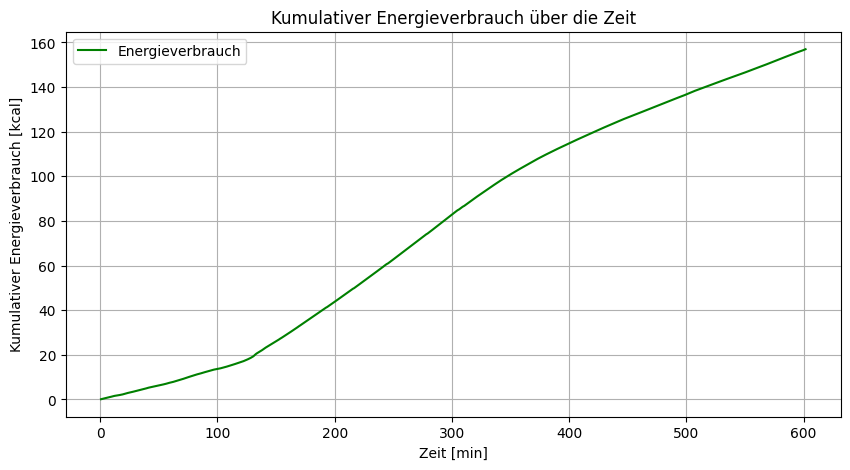

In [15]:
# Berechnung des metabolischen Energieverbrauchs für Frauen basierend auf HRR(Herzfrequenzreserve) und Körpergewicht
def energy_expenditure(hrr, weight, activity_level):
    if activity_level.lower() == 'low':
        energy = 0.744 + 0.0216 * hrr + 0.00699 * weight + 0.00102 * hrr * weight  # Low activity level
    elif activity_level.lower() == 'high':
        energy = 0.165 + 0.0688 * hrr + 0.02666 * weight + 0.00050 * hrr * weight  # High activity level
    else:
        raise ValueError("activity_level must be 'low' or 'high'")
    return energy

# Indizes für die Ruhephase (0-2 Minuten)
resting_phase = hr_time <= 120  # Erste 2 Minuten

# Ruhe- und Maximalherzfrequenz berechnen
resting_hr = np.mean(heartrate_filtered[resting_phase])  # Mittelwert der Ruhephase
max_hr = np.max(heartrate_filtered)  # Maximum der Maximalintensitätsphase

# Ruhe- und Maximalherzfrequenz ausgeben
print(f"Ruheherzfrequenz (resting_hr): {resting_hr:.2f} BPM")
print(f"Maximale Herzfrequenz (max_hr): {max_hr:.2f} BPM")

# Herzfrequenzreserve (HRR) berechnen
hrr = 100 * ((heartrate_filtered - resting_hr) / (max_hr - resting_hr))

# Werte für die Berechnung
weight = 55  # Gewicht in kg
activity_level = 'high'  # 'low' oder 'high'

# Berechnung des Energieverbrauchs für jede Herzfrequenz
energy_consumption = np.array([energy_expenditure(hrr, weight, activity_level) for hrr in heartrate_filtered])

# Annahme: Zeitabstände sind konstant (z.B. 1 Sekunde)
sampling_time = np.diff(hr_time).mean()  # Zeitintervall zwischen den Herzfrequenzdatenpunkten (in Sekunden)

# Umrechnung von kcal/min auf kcal/s (für jedes Intervall)
energy_consumption_per_second = energy_consumption / 60  

# Berechnung des kumulierten Energieverbrauchs
cumulative_energy = np.cumsum(energy_consumption_per_second * sampling_time)  # Kumulative Summe

# Zeit in Minuten für die kumulative Energieberechnung
time_minutes = np.arange(1, int(hr_time[-1] // 60) + 1)  

# Kumulierten Energieverbrauch pro Minute ausgeben
print("Kumulativer Energieverbrauch pro Minute:")
for minute in time_minutes:
    idx = np.where(hr_time >= minute * 60)[0][0]  
    print(f"Nach Minute {minute}: {cumulative_energy[idx]:.2f} kcal")

# Energieverbrauch über die Zeit plotten
plt.figure(figsize=(10, 5))
plt.plot(hr_time, cumulative_energy, color='g', label=f'Energieverbrauch')
plt.xlabel('Zeit [min]')
plt.ylabel('Kumulativer Energieverbrauch [kcal]')
plt.title(f'Kumulativer Energieverbrauch über die Zeit')
plt.grid(True)
plt.legend()
plt.show()

## Aufgabe 13
Berechnung des gesamten Energieverbrauchs:

In [16]:
sex = 'female'  # Geschlecht: 'männlich' oder 'weiblich'
weight = 55  # Gewicht in kg
hight = 166 # Körpergröße in cm
age = 24 # Alter in Jahren

# Gesamter Energieverbrauch in kcal berechnen
total_energy_kcal = cumulative_energy[-1]  # Letzter Wert der kumulierten Energie ist der Gesamte Energieverbrauch in kcal

# Umrechnung in Joule (1 kcal = 4184 Joule)
total_energy_joule = total_energy_kcal * 4184

# Umrechnung in Rittersport-Tafeln (1 Tafel Vollmilch = 527 kcal)
ritter_sport_tafeln = total_energy_kcal / 527

# Umrechnung in Bier (1 Bier = 215 kcal)
bier = total_energy_kcal / 215

# Grundumsatzberechnung (Harris-Benedict-Formel)
if sex == 'male':
    grundumsatz = 66.5 + (13.75 * weight) + (5.003 * hight) - (6.75 * age)
elif sex == 'female':
    grundumsatz = 655.1 + (9.563 * weight) + (1.850 * hight) - (4.676 * age)
else:
    raise ValueError("Geschlecht muss 'männlich' oder 'weiblich' sein")

calorie_percentage = (total_energy_kcal / grundumsatz) * 100  # Anteil in %

# Ausgabe der Ergebnisse
print("Ergebnisse des gesamten Energieverbrauchs:")
print(f"- Gesamter Energieverbrauch in Kalorien: {total_energy_kcal:.2f} kcal")
print(f"- Gesamter Energieverbrauch in Joule: {total_energy_joule:.2f} Joule")
print(f"- Entspricht etwa {ritter_sport_tafeln:.2f} Rittersport-Tafeln")
print(f"- Entspricht etwa {bier:.2f} Bier")
print(f"- Täglicher Kalorienbedarf: {grundumsatz:.2f} kcal")
print(f"- Anteil am täglichen Kalorienbedarf: {calorie_percentage:.2f}%")

Ergebnisse des gesamten Energieverbrauchs:
- Gesamter Energieverbrauch in Kalorien: 156.94 kcal
- Gesamter Energieverbrauch in Joule: 656641.52 Joule
- Entspricht etwa 0.30 Rittersport-Tafeln
- Entspricht etwa 0.73 Bier
- Täglicher Kalorienbedarf: 1375.94 kcal
- Anteil am täglichen Kalorienbedarf: 11.41%
